In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

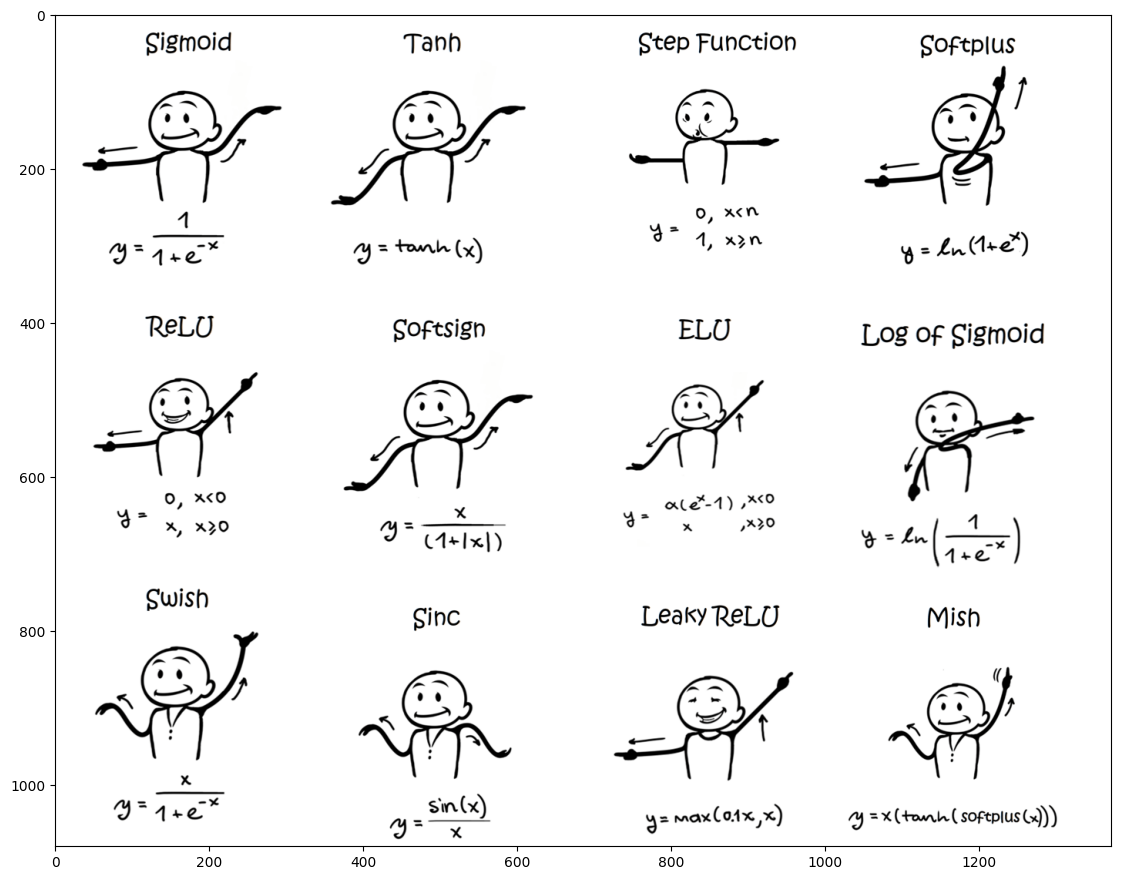

In [3]:
dance_moves_img = cv2.imread('./images/dance_moves_dl.png')
dpi = plt.rcParams['figure.dpi']

height, width, depth = dance_moves_img.shape
figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)
plt.imshow(dance_moves_img)

In [5]:
dance_moves_img.shape

(1080, 1372, 3)

0 343
343 0
0 343


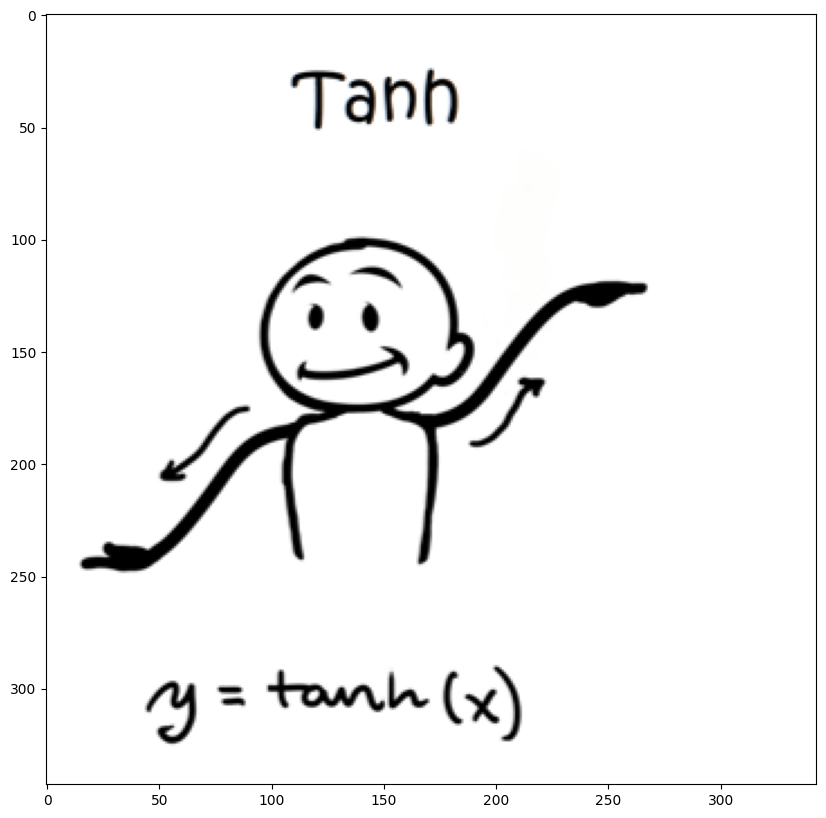

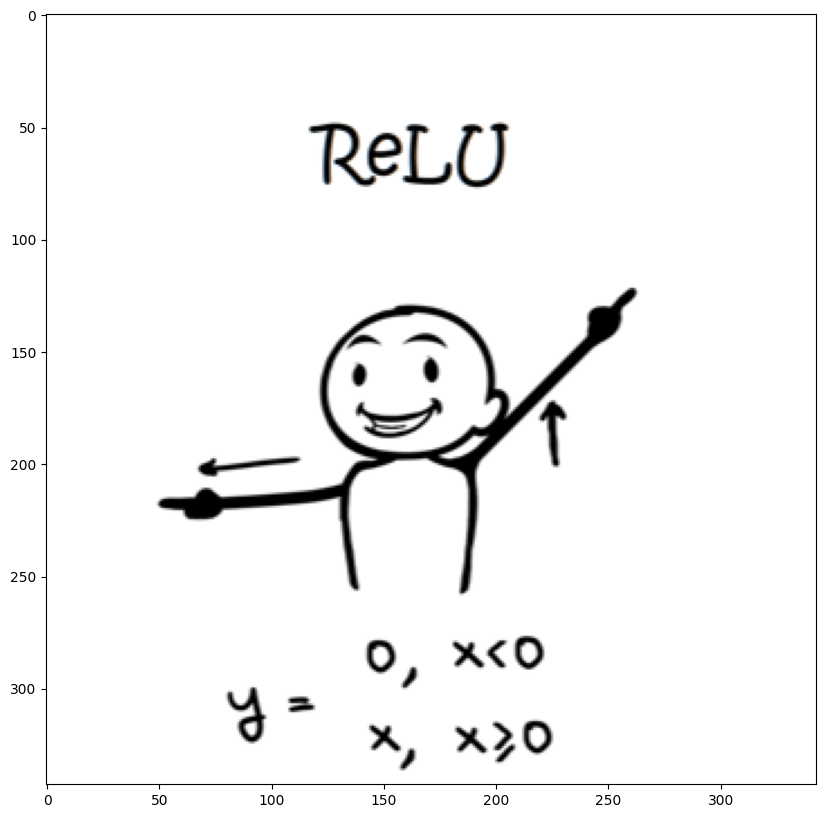

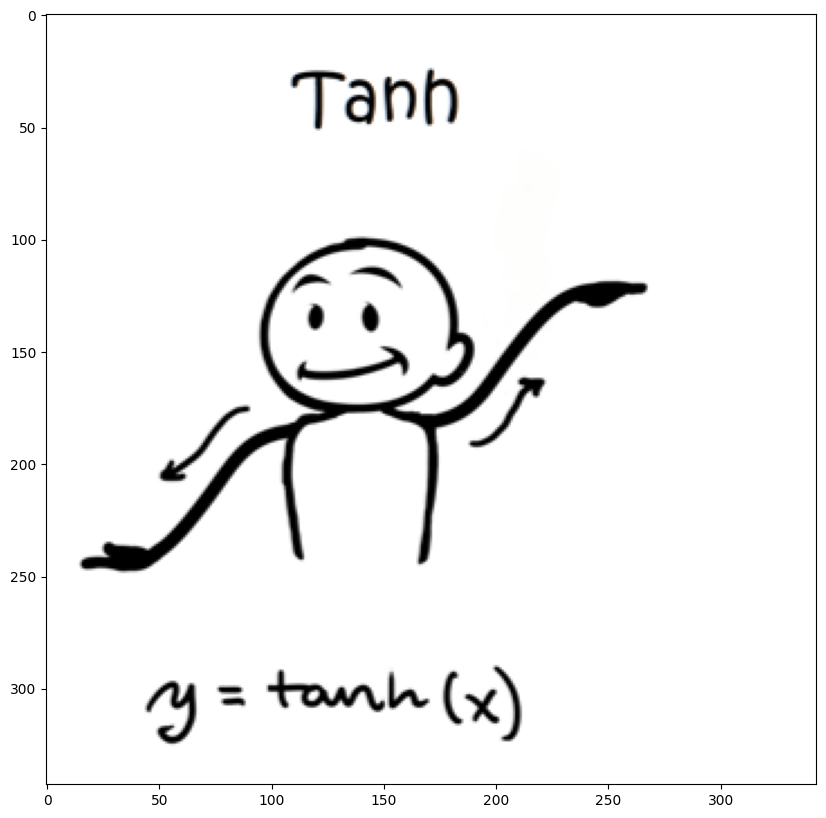

In [6]:
# show piece of the image
step_x = width // 4
step_y = height // 3
for i in range(3):
    n = random.randint(0,11)
    x = n // 4 * step_x
    y = n % 4 * step
    print(x, y)
    plt.figure(figsize=(10, 10))
    plt.imshow(dance_moves_img[x:x+step_x, y:y+step])

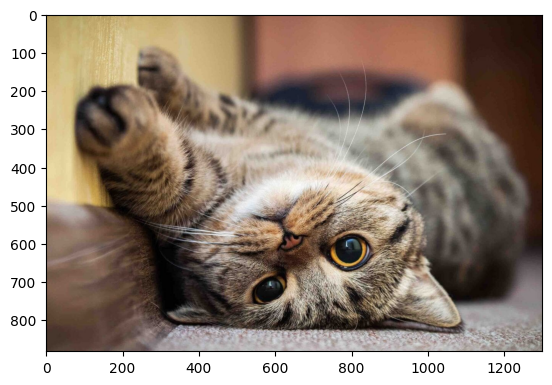

In [7]:
img = cv2.imread('./images/cute_cat.jpg') # BGR , RGB
# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # opencv uses BGR channel ordering, while matplotlib uses RGB channel ordering

plt.imshow(img)

In [8]:
img_height, img_width, img_channels = img.shape[0], img.shape[1], img.shape[2]
print('The image resolution is ', img_width, 'x', img_height)
print('The number of channels is ', img_channels)


The image resolution is  1300 x 882
The number of channels is  3


The shape of the resize image is: (400, 120, 3)


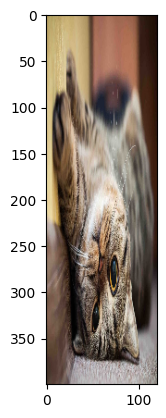

In [9]:
# resize image to (120, 400) - breaks the aspect ratio
img_resize_fixed =  cv2.resize(img, (120, 400))
print('The shape of the resize image is:', img_resize_fixed.shape)
plt.imshow(img_resize_fixed)

The shape of the resize image is: (220, 325, 3)


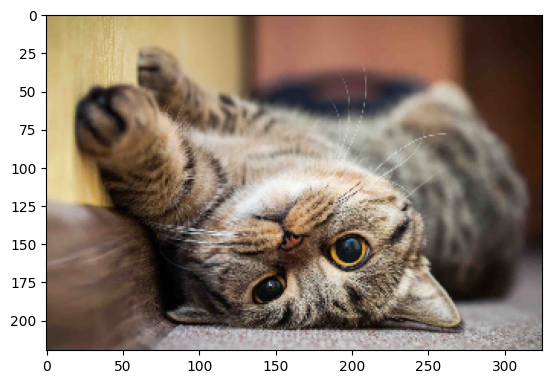

In [10]:
# resize the image to w/4 x h/4 (keeps the aspect ratio)
img_resize_prop = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
print('The shape of the resize image is:', img_resize_prop.shape)
plt.imshow(img_resize_prop)

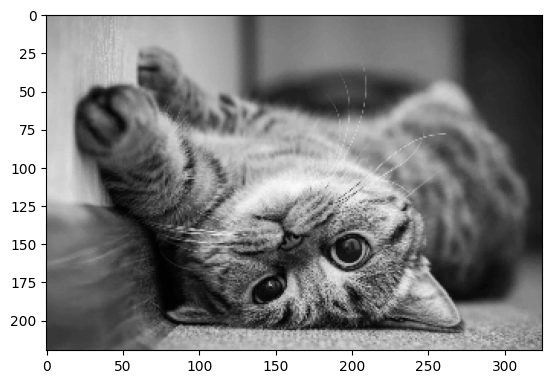

In [11]:
img_gray = 0.2126*img_resize_prop[:,:,0] + 0.7152*img_resize_prop[:,:,1] + 0.0722*img_resize_prop[:,:,2]
img_gray = img_gray.astype(np.uint8)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255) # use cmap='gray' (colormap) to display a grayscale image

hist, bins = np.histogram(img_gray, bins=255)# [0-255], 256

The histogram is:
 [  4  30 223  37 107  59 182  75 123 144  92 103 191 196 199 157 176 164
 218 219 295 413 239 242 269 342 220 438 355 240 220 544 408 373 668 384
 263 285 509 365 278 482 371 281 235 337 329 263 340 268 333 278 287 322
 326 359 406 330 336 336 315 341 442 394 316 369 441 453 410 381 441 405
 355 405 430 362 381 386 353 291 300 351 325 320 292 358 280 299 316 320
 302 375 335 369 356 409 366 374 346 327 322 377 342 339 318 323 329 297
 319 299 403 290 310 346 453 382 413 414 312 339 518 407 361 630 489 368
 399   0 664 594 374 515 508 335 285 328 405 264 263 370 257 239 246 232
 236 221 270 257 226 264 251 246 280 304 256 274 333 311 295 273 382 335
 369 405 379 343 350 376 350 397 473 407 351 341 426 453 373 423 455 407
 387 541 540 399 464 514 419 373 476 558 414 372 410 352 267 269 403 299
 246 345 238 208 245 300 234 240 207 145 117 141 152 148 161 189 149 109
  94 180 103  85  90  56  66  56  52  48  55  71  65  54  56  52  82  61
  45  41  32  26  40  47  26  26

Text(0.5, 1.0, 'histogram of the grayscale image')

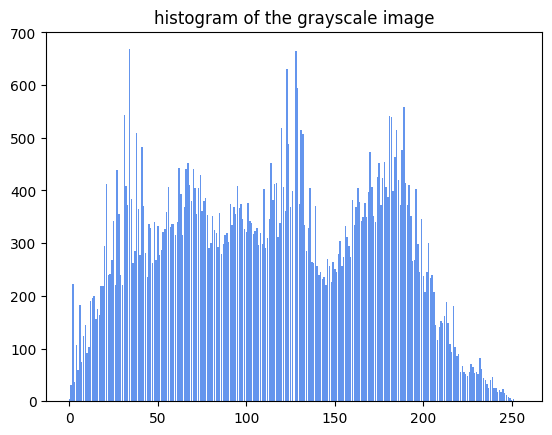

In [12]:
print('The histogram is:\n', hist)

plt.bar(np.arange(255), hist, color='cornflowerblue')
plt.title('histogram of the grayscale image')

Plot the histograms of the red, blue and green channel of an image on the same plot. The histogram of the red channel should be displayed in red bars, the histogram of the blue channel should be displayed in blue bars and the histogram of the green channel should be displayed with green bars.

Text(0.5, 1.0, 'histogram of the blue channel')

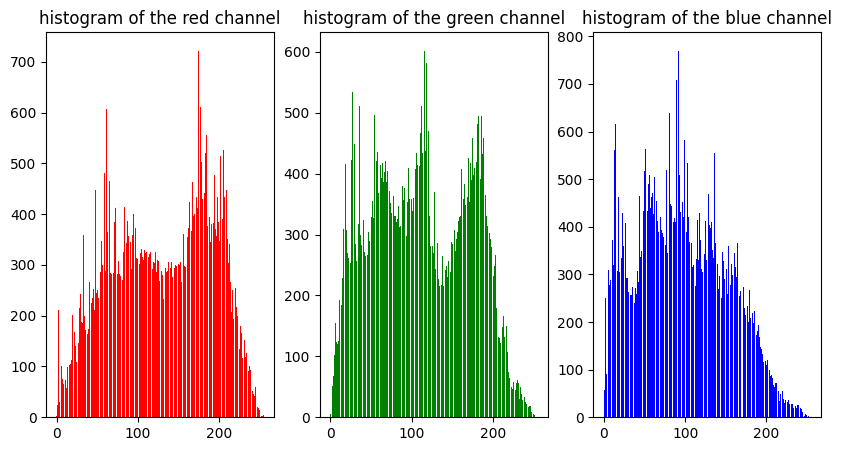

In [13]:
hist_r, bins = np.histogram(img_resize_prop[:,:,0], bins=255)

hist_g, bins = np.histogram(img_resize_prop[:,:,1], bins=255)

hist_b, bins = np.histogram(img_resize_prop[:,:,2], bins=255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(np.arange(255), hist_r, color='r')
plt.title('histogram of the red channel')

plt.subplot(1, 3, 2)
plt.bar(np.arange(255), hist_g, color='g')
plt.title('histogram of the green channel')


plt.subplot(1, 3, 3)
plt.bar(np.arange(255), hist_b, color='b')
plt.title('histogram of the blue channel')

Add to each element in the grayscale image with a positive number and store the result in img_l1.
What do you think is the effect of this operation? Display the image img_l1. Make sure that the result is in the range [0, 255].

(220, 325)


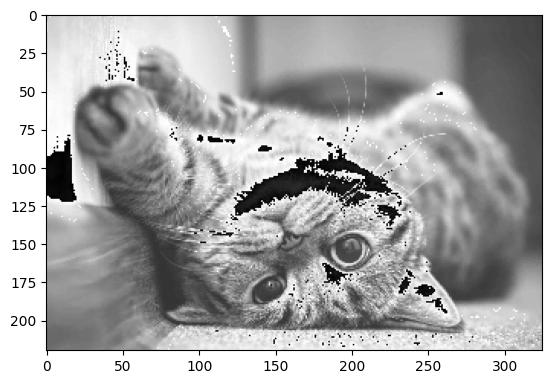

In [85]:
print(img_gray.shape)
img_l1= img_gray.copy()

img_l1[img_l1 + 50 < 255] += 50
img_l1[img_l1 + 50 >= 255] = 255

plt.imshow(img_l1, cmap='gray', vmin=0, vmax=255)


Compute and display the histogram of img_l1.  What do you notice? How is this histogram different than the previous one?

Text(0.5, 1.0, 'histogram of img_l1')

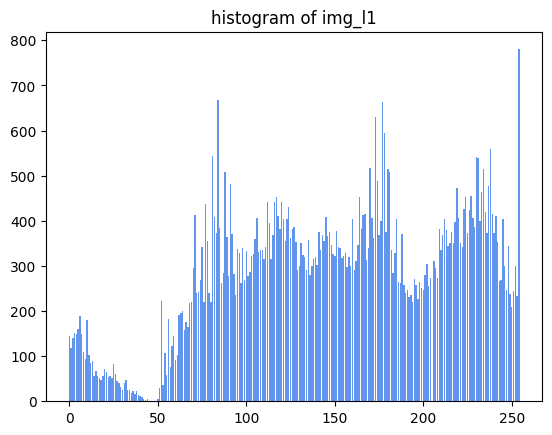

In [86]:
# histogram for modify gray img
hist, bins = np.histogram(img_l1, bins=255)
plt.bar(np.arange(255), hist, color='cornflowerblue')
plt.title('histogram of img_l1')

Now add to the grayscale image a negative number and store the result in img_l2.
If the resulting value is less than 0, clamp it to this 0.

What do you think is the effect of this operation?

(220, 325)


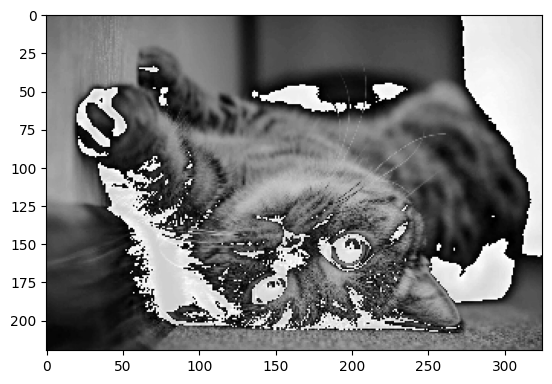

In [87]:
print(img_gray.shape)
img_l2= img_gray.copy()
img_l2[img_l2 - 50 >= 0] -= 50
img_l2[img_l2 - 50 < 0] = 0

plt.imshow(img_l2, cmap='gray', vmin=0, vmax=255)

Compute and display the histogram of img_l2. What do you notice? How is this histogram different than the previous ones?

Text(0.5, 1.0, 'histogram of img_l2')

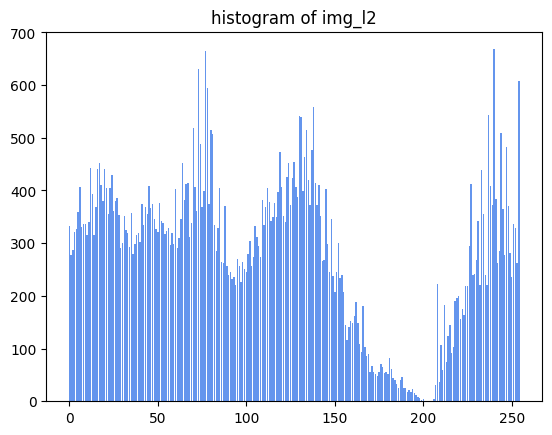

In [88]:
# histogram for modify gray img
hist, bins = np.histogram(img_l2, bins=255)
plt.bar(np.arange(255), hist, color='cornflowerblue')
plt.title('histogram of img_l2')


Add a positive number (for example 40) to the red channel of the color image and store the result in imgg. If the result of the addition exceeds 255, clamp it to 255.
What do you think is the effect of this operation?
Display the resulting image imgr.

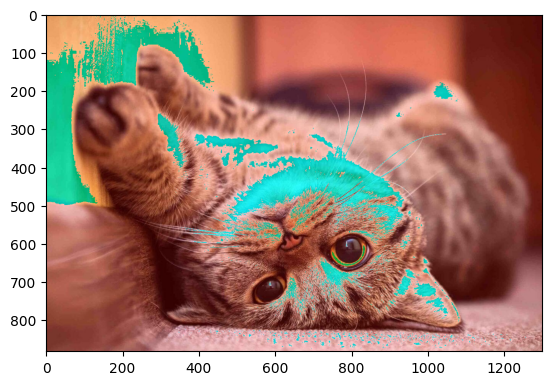

In [90]:
img_l3= img.copy()
img_l3[:,:,0] = img_l3[:,:,0] + 50

img_l3[img_l3 > 255] = 255

plt.imshow(img_l3)

Display a region of interest from the input image defined by the rectangle (x=350, y=400, sz=(500x400)).

Hint: an image is just a numpy array, so you can easily achieve this with array slicing.

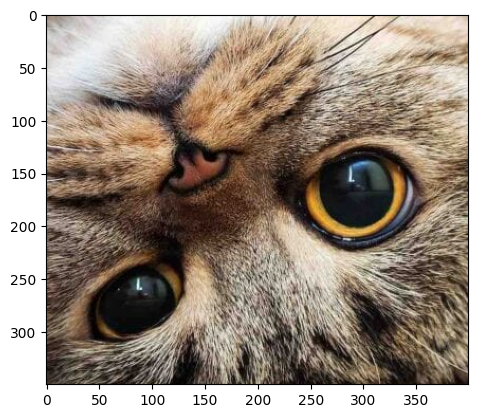

In [99]:
size_x =350
size_y = 400

img_l4 = img.copy()

img_l4 = img_l4[450:450+size_x,500:500+size_y,:]

plt.imshow(img_l4)